# One Shot Learning with Siamese Networks

This is the jupyter notebook that accompanies

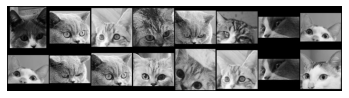

[[1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]
Epoch number 0
 Current loss 1.6415780782699585

Epoch number 1
 Current loss 50.24885559082031

Epoch number 2
 Current loss 49.5466194152832

Epoch number 3
 Current loss 49.83951187133789

Epoch number 4
 Current loss 7.496291637420654

Epoch number 5
 Current loss 23.86748504638672

Epoch number 6
 Current loss 18.79036521911621

Epoch number 7
 Current loss 24.113788604736328

Epoch number 8
 Current loss 29.608680725097656

Epoch number 9
 Current loss 10.720491409301758

Epoch number 10
 Current loss 6.962236404418945

Epoch number 11
 Current loss 21.81319808959961

Epoch number 12
 Current loss 4.28125

Epoch number 13
 Current loss 7.9046549797058105

Epoch number 14
 Current loss 7.497763633728027

Epoch number 15
 Current loss 2.8150241374969482

Epoch number 16
 Current loss 6.573598384857178

Epoch number 17
 Current loss 5.084346294403076

Epoch number 18
 Current loss 1.751822590827942

Epoch number 19
 Current loss 1.113

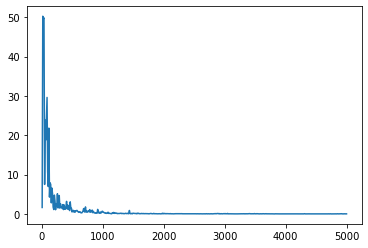

In [1]:
from SiameseNetworkDataset import SiameseNetworkDataset
from config import Config
from contrastiveLoss import ContrastiveLoss
from siameset import SiameseNetwork
from Util import *



   

def show_plot(iteration,loss):
    plt.plot(iteration,loss)
    plt.show()



folder_dataset = dset.ImageFolder(root=Config.training_dir+"/cat")

siamese_dataset = SiameseNetworkDataset(imageFolderDataset=folder_dataset,
                                        transform=transforms.Compose([transforms.Resize((100,100)),
                                                                      transforms.ToTensor()
                                                                      ])
                                       ,should_invert=False)

vis_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=8)
dataiter = iter(vis_dataloader)


example_batch = next(dataiter)
concatenated = torch.cat((example_batch[0],example_batch[1]),0)
imshow(torchvision.utils.make_grid(concatenated))
print(example_batch[2].numpy())



train_dataloader = DataLoader(siamese_dataset,
                        shuffle=True,
                        num_workers=0,
                        batch_size=Config.train_batch_size)              

net = SiameseNetwork()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.0005 )                        


counter = []
loss_history = [] 
iteration_number= 0


for epoch in range(0,Config.train_number_epochs):
    for i, data in enumerate(train_dataloader,0):
        img0, img1 , label = data
        img0, img1 , label = img0, img1 , label
        optimizer.zero_grad()
        output1,output2 = net(img0,img1)
        loss_contrastive = criterion(output1,output2,label)
        loss_contrastive.backward()
        optimizer.step()
        if i %10 == 0 :
            print("Epoch number {}\n Current loss {}\n".format(epoch,loss_contrastive.item()))
            iteration_number +=10
            counter.append(iteration_number)
            loss_history.append(loss_contrastive.item())
show_plot(counter,loss_history)

PATH = "./catnet.pt"
torch.save(net.state_dict(),PATH)